In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

heatmap = defaultdict(int)
# here, we open the input file mapped.bed
with open("mapped.bed", "r") as f:
    for line in f:
        cols = line.strip().split()
        
        C1 = (int(cols[2]) + int(cols[3])) / 2
        C2 = (int(cols[8]) + int(cols[9])) / 2

        X = C2 - C1
        Y = int(cols[9]) - int(cols[8])

        heatmap[(X, Y)] += 1

valx = sorted(set(k[0] for k in heatmap))
valy = sorted(set(k[1] for k in heatmap))
idxx = {x: i for i, x in enumerate(valx)}
idxy = {y: i for i, y in enumerate(valy)}

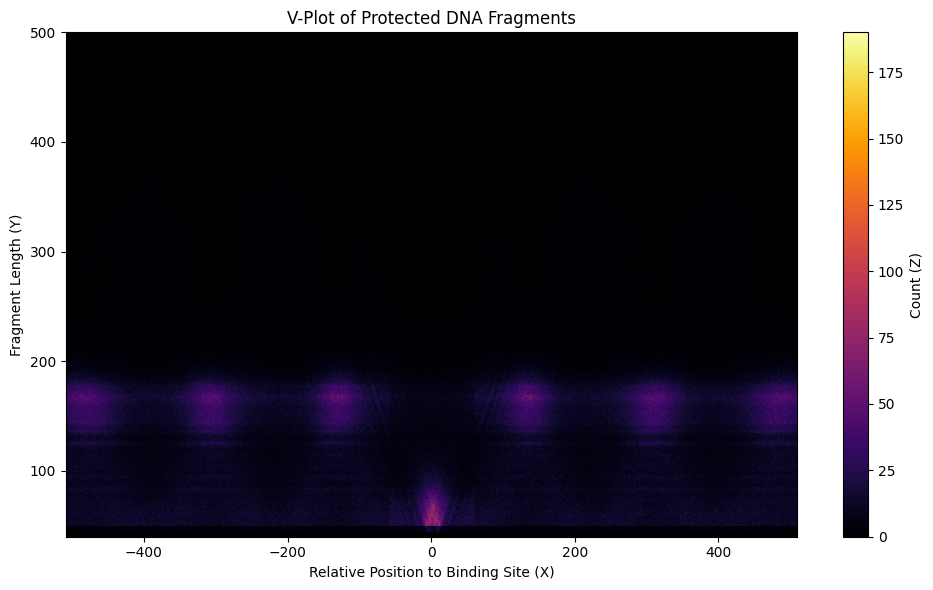

In [19]:
#plotting the heat-map
heat = np.zeros((len(valy), len(valx)))

for (x, y), z in heatmap.items():
    heat[idxy[y]][idxx[x]] = z

plt.figure(figsize=(10, 6))
plt.imshow(
    heat,
    aspect='auto',
    origin='lower',
    extent=[min(valx), max(valx), min(valy), max(valy)],
    cmap="inferno"
)
plt.colorbar(label="Count (Z)")
plt.xlabel("Relative Position to Binding Site (X)")
plt.ylabel("Fragment Length (Y)")
plt.title("V-Plot of Protected DNA Fragments")
plt.tight_layout()
plt.show()
